In [ ]:
%matplotlib inline
# Load the "autoreload" extension
%load_ext autoreload
# always reload modules
%autoreload 2
# black formatter for jupyter notebooks 
#%load_ext nb_black
# black formatter for jupyter lab
%load_ext lab_black

%run ../src/notebook_env.py

# The Central Limit Theorem

**Import modules**

In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

The **central limit theorem** is one of the most useful concepts in statistics. The theorem is all about about drawing samples of a finite size $n$ from a population. The  theorem states that  if one collects samples of a large enough sample size $n$, and calculates each sample's mean (or sum), the shape of the histogram of those means (or sums) approximate a normal bell shape. The usefulness of the central limit theorem is due to the fact, that it **it does not matter what the distribution of the original population is, the distribution of sample means and the sums tend to follow the normal distribution.**

## The Population Distribution

The **population distribution** is the probability distribution derived from the knowledge of all elements of a population. We know that depending on the population of interest the random variable of interest may be a discrete variable, is to say a variable that, at least in principle is countable, or the random variable of interest may be a continuous variable, and thus a variable that can take any value within a given interval. Both, the discrete and the continuous probability distribution may be described by statistical parameters, such as the mean, the standard deviation, the median, the mode, among others. These parameters describing the population are, however, **always constant**, because the population is the set of all elements and thus population statistics do not change. For example, for any population data set, there is **only one value** of the population mean, **one value** for the standard deviation and so on.

## Population Statistics and Sample Statistics

Let us consider a simple example of a small discrete population consisting of the first ten integers $\{1,2,3,4,5,6,7,8,9,10 \}$. 

In [4]:
population  = [1,2,3,4,5,6,7,8,9,10]

mean = np.mean(population)

std = np.std(population, ddof=1)

print(mean, std)

5.5 3.0276503540974917


The population mean, denoted by $\mu$ and the population standard deviation, denoted by $\sigma$ is $5.5$ and approximately {mean} $3.028$, respectively. It is important to realize, that these parameters, the population parameters will not change! They are fixed.

Let us now take a random sample without replacement of size $n=3$ from this population.

In [5]:
my_sample = np.random.choice(population, size = 3, replace=False)

my_sample

array([8, 6, 1])

Now we caculate the mean and the standard deviation of the given sample. However, this time, as we refer to a particular sample, we call the statistical parameter **sample statistic** or if we relate to the distribution of values (elements) **sample distribution**. To make this more explicit, the sample mean is denominated as $\bar{x}$ and the sample standard deviation as $s$.

In [6]:
x_bar = np.mean(my_sample)

s_x = np.std(my_sample)

print(x_bar, s_x)

5.0 2.943920288775949


Note that depending on the actual elements in the sample, the sample statistic will change from sample to sample.

## The Sampling Error

Let us repeat the sampling process from the previous section for $5$ times, store the results in the variable <mark> my_experiment </mark> and in addition print out the mean, $\bar{x}$ for each particular sample.

In [7]:
population  = [1,2,3,4,5,6,7,8,9,10]

my_experiment = []

for i in range(1,6):
    my_sample = np.random.choice(population, size=3)
    mean= np.mean(my_sample)
    my_experiment.append(mean)
    print('Sample number {0} has a mean of {1}'.format(i, mean))

Sample number 1 has a mean of 6.666666666666667
Sample number 2 has a mean of 5.333333333333333
Sample number 3 has a mean of 5.0
Sample number 4 has a mean of 5.0
Sample number 5 has a mean of 5.666666666666667


Obviously, different sample (of the same length) selected from the same population yield different sample statistics because they contain different elements. Moreover, any sample statistics obtained from any sample, such as the sample mean $\bar{x}$, will be different from the result obtained from the corresponding population, the population mean, $\mu$. The difference between the value of a sample statistic obtained from a sample and the value of the corresponding population parameter obtained from the population is called the **sampling error**. In the case of the mean, the sampling error can be written as

$$ \text{Sampling error} = \bar{x} - \mu$$

Due to the nature of random sampling, and thus due to the process of drawing a set of values from the population, the resulting sampling error occurs due to chance, or in other words, the sampling error is a a random variable. However, one should note that besides the described randomness there are other sources of error. These errors are often related to the data generation process and are subsumed under the term non-sampling error. Such errors are introduced by for example human handling of the data, calibration errors of the measuring devices, among others.

In order to gain some intuition on the nature of the sampling error we conduct an experiment. For this experiment the population of interest consists of the first $100$ integers $\{1,2,3,\dots,100 \}$. We want to analyse the effect of the sample size, $n$, on the sampling error. For the sake of simplicity we choose the sample mean as the statistic of interest. For a sufficient large number of trials (<mark> trials = 1000 </mark>) we calculate the sampling error for samples of size $n=10,25,50,75$.

In [8]:
population = list(range(1,101))

mean_pop = np.mean(population)

error_sample_10 = []
error_sample_25 = []
error_sample_50 = []
error_sample_100 = []

# we do 1000 trials
for i in range(1,1001):
    my_sample_10 = np.random.choice(population, size=10)
    my_sample_25 = np.random.choice(population, size=25)
    my_sample_50 = np.random.choice(population, size=50)
    my_sample_100 = np.random.choice(population, size=100)
    
    mean_10 = np.mean(my_sample_10)
    mean_25 = np.mean(my_sample_25)
    mean_50 = np.mean(my_sample_50)
    mean_100 = np.mean(my_sample_100)
    
    error_sample_10.append(abs(mean_10- mean_pop))
    error_sample_25.append(abs(mean_25- mean_pop))
    error_sample_50.append(abs(mean_50- mean_pop))
    error_sample_100.append(abs(mean_100- mean_pop))
    
print('Sampling Error, n=10: ', np.mean(error_sample_10))
print('Sampling Error, n=25: ', np.mean(error_sample_25))
print('Sampling Error, n=50: ', np.mean(error_sample_50))
print('Sampling Error, n=100: ', np.mean(error_sample_100))

Sampling Error, n=10:  7.438899999999999
Sampling Error, n=25:  4.416120000000001
Sampling Error, n=50:  3.2653999999999996
Sampling Error, n=100:  2.27228


Based on the experiment from above, we may conclude, that the large the sample size, the smaller is the sampling error. Or in other words, by increasing the sample size the sample mean, $\bar{x}$ approximate the population mean, $\mu$. This is an important insight, which will be discussed in more details in the section of *Inferential Statistics*.

## The Sampling Distribution

Based upon our intuition of randomness in the sampling process, we introduce the **Sampling Distribution**. The sampling distribution is a distribution of a sample statistic. Often the name of the computed statistic is added as part of the title. For example, if the computed statistic was the sample mean, the sampling distribution would be titled **the sampling distribution of the sample mean**.

Let us recall the simple example from the previous section, where the population is represented by the first $100$ integers $\{1,2,3,\dots,100 \}$. If we repeatedly sample from that population and compute each time the sample statistic (e.g. $\bar{x}$ or $s$,...), **the resulting distribution of sample statistics is a called the sampling distribution of that statistic**.

Let us take repeatedly random samples $(x)$ without replacement of size $n=30$ from the population.

The random sampling might generate sets that look like

$$\{19, 79, 33, 38, 14, 67, 7, 9, 12, 27, 4, 89, 34, 77, 78, 32, 65, 10, 84, 64, 90, 55, 88, 56, 11, 80, 15, 5, 91, 54\}$$

or 

$$\{43, 52, 56, 8, 65, 60, 46, 15, 64, 19, 82, 91, 88, 1, 5, 9, 4, 92, 67, 36, 72, 31, 50, 96, 87, 6, 93, 84, 78, 16\}$$

...

For each sample we calculate a sample statistic. In this example we take the mean, $\bar{x}$, of each sample. However, please note that the sample statistic could be any descriptive statistic, such as the median, the standard deviation, a proportion, among others. Once we obtained the sample means for all samples. we list all their different values and number of their occurrences (frequencies) in order to obtain relative frequencies or **empirical probabilities**.

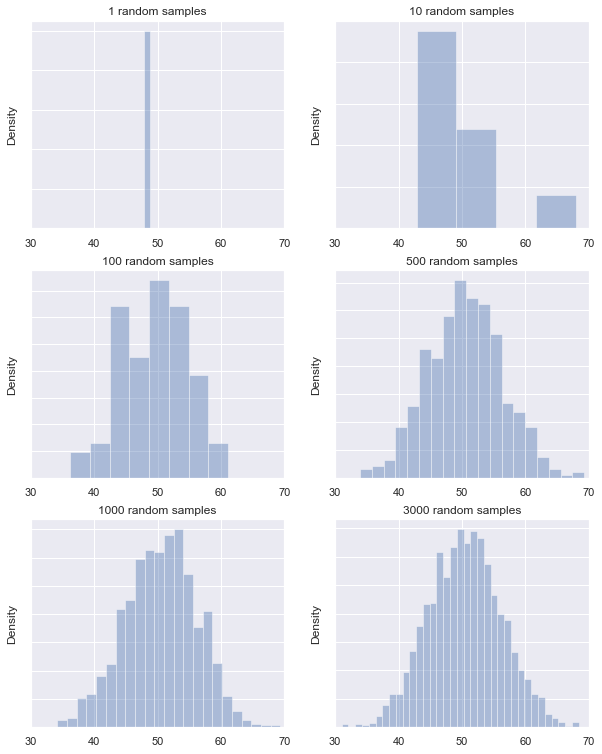

In [12]:
population = list(range(1,101))

mean_pop = np.mean(population)

num_samples = [1,10,100,500,1000,3000]

my_sample = [[],[],[],[],[],[]]

for i in range(0,6):   
    for j in range(1, num_samples[i] + 1):
        sample = np.random.choice(population, size=25)
        mean_sample = np.mean(sample)
        my_sample[i].append(mean_sample)

sns.set(rc={'figure.figsize':(10,13)})
    
fig, axs = plt.subplots(3,2)
axs[0,0].set_yticklabels('')
axs[0,1].set_yticklabels('')
axs[1,0].set_yticklabels('')
axs[1,1].set_yticklabels('')
axs[2,0].set_yticklabels('')
axs[2,1].set_yticklabels('')
sns.distplot(my_sample[0], ax=axs[0,0])
axs[0,0].set_title('1 random samples')
axs[0,0].set_xlim(30,70)
sns.distplot(my_sample[1], ax=axs[0,1],kde=True, kde_kws={'alpha':0.0})
axs[0,1].set_title('10 random samples')
axs[0,1].set_xlim(30,70)
sns.distplot(my_sample[2], ax=axs[1,0], kde=True, kde_kws={'alpha':0.0})
axs[1,0].set_title('100 random samples')
axs[1,0].set_xlim(30,70)
sns.distplot(my_sample[3], ax=axs[1,1], kde=True, kde_kws={'alpha':0.0})
axs[1,1].set_title('500 random samples')
axs[1,1].set_xlim(30,70)
sns.distplot(my_sample[4], ax=axs[2,0] , kde=True, kde_kws={'alpha':0.0})
axs[2,0].set_title('1000 random samples')
axs[2,0].set_xlim(30,70)
sns.distplot(my_sample[5], ax=axs[2,1], kde=True, kde_kws={'alpha':0.0})
axs[2,1].set_title('3000 random samples')
axs[2,1].set_xlim(30,70)

import warnings
warnings.filterwarnings(action='always')

pass


The more often we take a sample the better the relative frequency distribution of the sample statistics approximates the sampling distribution. Or in other words, as the number of sample approaches infinity, the resulting frequency distribution will approach the sampling distribution. The **sampling distribution of a statistic** is a probability distribution of that statistic derived from all possible samples having the same size from the population. However, the sampling distribution should not be confused with a sample distribution: the latter describes the distribution of values (elements) in one particular sample.

## The Standard Error

Just as the population distributions can be described with parameters, so can the sampling distribution. The expected value (mean) of any distribution can be represented by the symbol $\mu$. In case of the sampling distribution, the mean $\mu$ is often written with a subscript to indicate which sampling distribution is being described. For example, the expected value of the sampling distribution of the mean is represented by the symbol $\mu_{\bar{x}}$. The value of $\mu_\bar{x}$ can be thought as the theoretical mean of the distribution of sample means.

If we pick a large enough number of samples (of the same size) from a population and calculate their means, then the mean $(\mu_{\bar{x}})$ of all these sample means will approximate the mean $(\mu)$ of the population. That is why the sample mean $\bar{x}$ is called an estimator of the population mean, $\mu$. Thus, the mean of the sampling distribution is equal to the mean of the population.

$$\mu_{\bar{x}} = \mu$$

The standard deviation of a sampling distribution is given a special name, the **standard error**. The standard error of the sampling distribution of a statistic, denoted as $\sigma_{\bar{x}}$, describes the degree to which the computed statistic may be expected to differ from one another when calculated from a sample of similar size and selected from similar population models. The larger the standard error of a given statistic, the greater the differences between the computed statistics for the different samples.

However, please note that the standard error, $\sigma_{\bar{x}}$ is not equal to the standard deviation, $\sigma$, of the population distribution (unless $n=1$). the standard error is equal to the standard deviation of the population divided by the square root of the sample size:

$$\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}}$$

This equation holds true only when the sampling is done either with replacement from a finite population or with or without replacement from an infinite population. Which corresponds to the condition that the sample size $(n)$ is small in comparison to the population size $(N)$. The sample size is considered to be small compared to the population size if the sample size is equal to or less than $5$% of the population size that is, if

$$\frac{n}{N} \leq 0.05$$

If this condition is not satisfied, the following equation is used to calculate $\sigma_{\bar{x}}$:

$$\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}} \sqrt{\frac{N-n}{N-1}}$$

In most practical applications, however, the sample size is small compared to the population size.

## Sampling from a Normally Distributed Population 

### Shape of the Sampling Distribution

The shape of the sampling distribution relates to the following two cases:

1. The population from which samples are drawn has a normal distribution.

2. The population from which samples are drawn does not have a normal distribution.

### Sampling from a Normally Distributed Population

When the population from which samples are drawn is normally distributed with its mean equal to $\mu$ and the standard deviation equal to $\sigma$, then:

1. The mean of the sample means, $\mu_{\bar{x}}$, is equal to the mean of the population, $\mu$.

2. The standard deviation of the sample means, $\sigma_{\bar{x}}$ is equal to $\frac{\sigma}{\sqrt{n}}$, assuming $\frac{n}{N} \leq 0.05$.

3. The shape of the sampling distribution of the sample means $\bar{x}$ is normal, for whatever value of $n$.

Let us consider a normally distributed population. For the sake of simplicity we use the standard normal distribution $N(\mu,\sigma)$ with $\mu=0$ and $\sigma=1$. Let us further calculate $\mu_{\bar{x}}$ and $\sigma_{\bar{x}}$ for samples of sample sizes $n=5,15,30,50$.

Recall that for a large enough number of repeated sampling $\mu_{\bar{x}} \approx \mu$. Thus, $\mu_{\bar{x}}$ of the different sampling distributions under consideration.

$$\mu_{\bar x_{n=5}} = \mu_{\bar x_{n=15}} = \mu_{\bar x_{n=30}} = \mu_{\bar x_{n=50}} = \mu = 0$$

Recall the standard error of the sampling distribution $\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}} $. Thus, we can easily compute $\sigma_{\bar{x}}$ for $n=5,15,30,50$ elements. The different sampling distributions are visualized thereafter.

$$\sigma_{\bar x_{n=5}} = \frac{\sigma}{\sqrt{n}} =
\frac{1}{\sqrt{5}}\approx 0.447$$

$$ \sigma_{\bar x_{n=15}} = \frac{\sigma}{\sqrt{n}} = \frac{1}{\sqrt{15}}\approx 0.258 $$

$$ \sigma_{\bar x_{n=30}} = \frac{\sigma}{\sqrt{n}} = \frac{1}{\sqrt{30}}\approx 0.183 $$

$$ \sigma_{\bar x_{n=50}} = \frac{\sigma}{\sqrt{n}} = \frac{1}{\sqrt{50}} \approx 0.141 $$

![sampling_distribution_norm](_img/sampling_distribution_norm.png)

There are two important observations regarding the sampling distribution of $\bar{x}$

1. The spread of the sampling distribution is smaller than the spread of the corresponding population distribution. In other words, $\sigma_{\bar{x}} < \sigma$.

2. The standard deviation of the sampling distribution decreases as the sample size increases.

In order to verify the 3rd claim from above, that the shape of the sampling distribution of $\bar{x}$ is normal, whatever the value of $n$, we conduct a computational experiment. For a large enough number of times <mark> trials = 1000 </mark> we sample from the standard normal distribution $N(0,1)$, where each particular sample has a sample size of $n=5,15,30,50$. For each sample we calculate the sample mean $\bar{x}$ and visualize the empirical probabilities. Afterwards we compare the empirical distribution of those probabilities with the sampling distributions calculated from the equations above.

![sampling_diff_n](_img/sampling_diff_n.png)

The figure verifies the 3rd claim above: The shape of the sampling distribution of $\bar{x}$ is normal, for whatever value of $n$.

In addition, the figure shows that the distribution of the empirical probabilities (bars) fits well the sampling distribution (colored line), and that the standard deviation of the sampling distribution of $\bar{x}$ decreases as the sample size increases. Recall, that the $y$-axis represents the *density*, which is the **probability per unit value** of the random variable. This is why the probability density can take a value greater than $1$, but only over a region with measure less than $1$.

## Sampling from a Population that is not Normally Distributed

### Shape of the Sampling Distribution

The shape of the sampling distribution relates to the following two cases.

1. The population from which samples are drawn has a normal distribution.

2. The population from which samples are drawn does not have a normal distribution.

### Sampling from a population which is not normally distributed

In the previous section we discussed the shape of sample distributions if sampling from a normally distributed population. However, in real life applications we often do not know the actual shape of the population distribution.

In order to understand, how the shape of the distribution of the population of interest affects the shape of the sampling distribution we conduct an experiment. Let us consider three different continuous probability density functions: the **uniform distribution**, the **beta distribution**, and the **gamma distribution**. We do not go into details here, however the figure below shows, that these three PDFs are not normally distributed.

![uniform_beta_gamma](_img/uniform_beta_gamma.png)

Now we conduct the same experiment as in the previous section. For a large enough number of times <mark>trials = 1000 </mark> we sample from each particular distribution. However, this time each particular sample has a sample size $n=2,5,15,30$. For each sample we calculate the sample mean $\bar{x}$ and visualize the empirical probabilities after $1000$ trials.

![sampling_beta_gamma_uniform](_img/sampling_beta_gamma_uniform.png)

The figure shows that, in case of a population that is not normally distributed, the sampling distributions are not normal, when $n<30$. However, the sampling distributions approximate a normal distribution, when $n>30$. Also notice that the spread of the sampling distribution decreases as the sample size increases.

According to the **central limit theorem**, for a large sample size $(n > 30)$, the sampling distribution is approximately normal, irrespective of the shape of the population distribution.

The mean and standard deviation of the sampling distribution of $\bar{x}$ are, respectively,

$$\mu_{\bar{x}} = \mu \text{   and   } \sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}}$$

The sample size is usually considered to be large if $n \geq 30$.

Owing to the fact the sampling distribution approximates a normal distribution, the area under the curve of sampling distribution yields probabilistic information about the sample statistic.

Recall the **Empirical Rule**, also known as the **68-95-99.7 rule**. Consequently, applied to the sampling distribution the $68-95-99.7$ rule implies that

- about $68.26$% of the sample means will be within one standard deviation of the population mean,

- $95.44$% of the sample means will be within two standard deviation of the population mean, and

- about $99.74$% of the sample means will be within three standard deviations of the population mean.